In [1]:
!pip install pandas 
!pip install numpy
!pip install seaborn
!pip install matplot.lib
!pip install sklearn


[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement matplot.lib (from versions: none)
ERROR: No matching distribution found for matplot.lib

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [2]:
pip install category-encoders



[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
!pip install xgboost==2.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 6.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression,Ridge, Lasso
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

from sklearn.feature_selection import chi2, SelectKBest,f_classif, f_regression, SelectKBest
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

En primer lugar vemos la información aquí debajo, sin presentar valores duplicados, el tipo de dato que tenemos, la composición del df

Tenemos 5 variables categóricas de las cuales: 1 a priori es no importante, el estado puede ser relevante, otras tres se traducirán en 0,1 porque son si/no o boolenos a corregir.

In [5]:
df = pd.read_csv('/work/churn_dataset/churn_all' )

print(df.info(), df.duplicated().sum())

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   object 
 4   international_plan             5000 non-null   object 
 5   voice_mail_plan                5000 non-null   object 
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,50,408,365-8751,no,yes,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,False.
4996,WV,152,415,334-9736,no,no,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,True.
4997,DC,61,415,333-6861,no,no,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,False.
4998,DC,109,510,394-2206,no,no,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,False.


In [6]:
correlation1 = df['total_day_minutes'].corr(df['total_day_charge'])
correlation2 = df['total_day_calls'].corr(df['total_day_charge'])

print(round(correlation1,4), '      ',round(correlation2,4))

correlation1 = df['total_eve_minutes'].corr(df['total_eve_charge'])
correlation2 = df['total_eve_calls'].corr(df['total_eve_charge'])

print(round(correlation1,4), '      ',round(correlation2,4))

correlation1 = df['total_night_minutes'].corr(df['total_night_charge'])
correlation2 = df['total_night_calls'].corr(df['total_night_charge'])

print(round(correlation1,4), '      ',round(correlation2,4))

correlation1 = df['total_intl_minutes'].corr(df['total_intl_charge'])
correlation2 = df['total_intl_calls'].corr(df['total_intl_charge'])

print(round(correlation1,4), '      ',round(correlation2,4))

1.0        0.0177
1.0        0.0028
1.0        0.0269
1.0        0.0169


Hacemos una clasificación por uso del 1 al 5 donde 5 es el de mayor uso y 1 el de menor uso

In [7]:
df['calls'] = df['total_intl_calls']+df['total_night_calls'] + df['total_eve_calls'] + df['total_day_calls']
df['calls-cla'] = pd.qcut(df['calls'], q=5, labels=False) + 1
df['charge'] = df['total_intl_charge']+df['total_night_charge'] + df['total_eve_charge'] + df['total_day_charge']
df['charge-cla'] = pd.qcut(df['charge'], q=2, labels=False) + 1
df['day-cla'] = pd.qcut(df['total_day_calls'], q=5, labels=False) + 1
df['day-eve'] = pd.qcut(df['total_eve_calls'], q=5, labels=False) + 1
df['day-night'] = pd.qcut(df['total_night_calls'], q=5, labels=False) + 1
df['day-intl'] = pd.qcut(df['total_intl_calls'], q=5, labels=False) + 1

Charges es lineal a minutes por lo cual usando una de las variables podemos apreciar las

In [8]:
le = LabelEncoder()


df['Churn'] = le.fit_transform(df['Churn'])
df['international_plan'] = le.fit_transform(df['international_plan'])
df['voice_mail_plan'] = le.fit_transform(df['voice_mail_plan'])

In [9]:
columns_drop = ['total_day_minutes','total_eve_minutes','total_night_minutes','total_intl_minutes','total_day_calls','total_eve_calls','total_night_calls','total_intl_calls','total_day_charge','total_eve_charge','total_night_charge','total_intl_charge','account_length','phone_number']


df = df.drop(columns=columns_drop)
df

#df['Column'] = df['Column'].str.extract('(\d+)') 

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Churn,calls,calls-cla,charge,charge-cla,day-cla,day-eve,day-night,day-intl
0,KS,415,0,1,25,1,0,303,3,75.56,2,4,3,2,2
1,OH,415,0,1,26,1,0,332,4,59.24,1,5,3,3,2
2,NJ,415,0,0,0,0,0,333,4,62.29,2,4,4,3,3
3,OH,408,1,0,0,2,0,255,1,66.80,2,1,2,2,5
4,OK,415,1,0,0,3,0,359,5,52.09,1,4,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,408,0,1,40,2,0,374,5,75.09,2,5,5,4,3
4996,WV,415,0,0,0,3,1,278,2,66.72,2,2,1,4,1
4997,DC,415,0,0,0,1,0,318,4,51.82,1,2,5,3,3
4998,DC,510,0,0,0,0,0,254,1,59.09,1,1,2,2,4


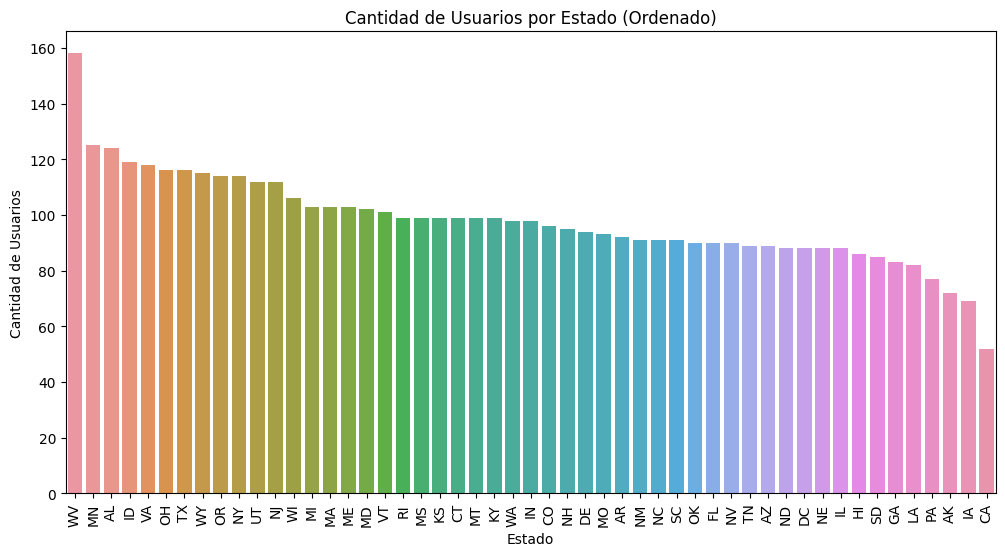

In [10]:
state_counts = df['state'].value_counts().sort_values(ascending=False)



plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='state', order=state_counts.index)
plt.title('Cantidad de Usuarios por Estado (Ordenado)')
plt.xlabel('Estado')
plt.ylabel('Cantidad de Usuarios')
plt.xticks(rotation=90)
plt.show()


No apreciamos gran relacion entre que un cliente este en un estado y su tasa de deserción

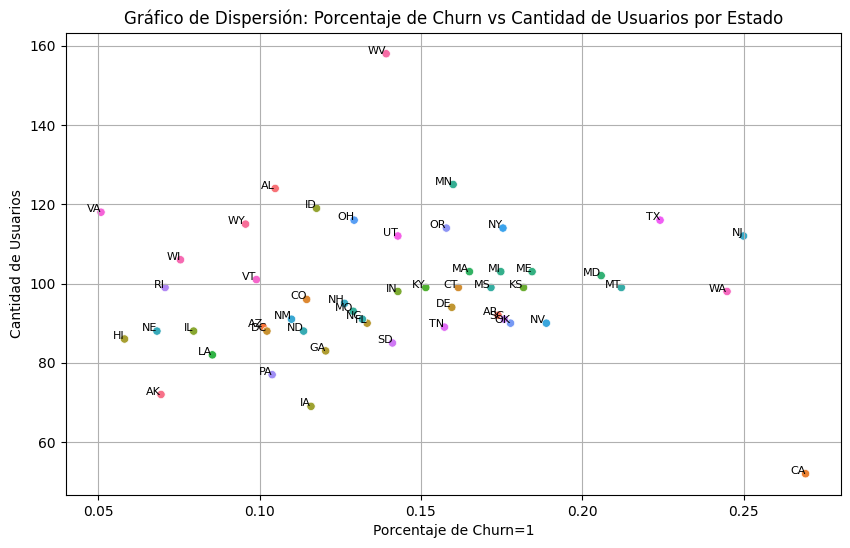

0.03512800152829439


In [11]:

state_churn_percentage = df.groupby('state')['Churn'].mean().reset_index()


state_user_counts = df['state'].value_counts().reset_index()
state_user_counts.columns = ['state', 'Cantidad de Usuarios']


state_data = pd.merge(state_churn_percentage, state_user_counts, on='state')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=state_data, x='Churn', y='Cantidad de Usuarios', hue='state', legend=False)
plt.title('Gráfico de Dispersión: Porcentaje de Churn vs Cantidad de Usuarios por Estado')
plt.xlabel('Porcentaje de Churn=1')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)


for i, row in state_data.iterrows():
    plt.annotate(row['state'], (row['Churn'], row['Cantidad de Usuarios']), fontsize=8, ha='right')

plt.show()
correlation = state_data['Churn'].corr(state_data['Cantidad de Usuarios'])

print( correlation)

Aqui podemos ver que tenemos una significativa tasa de deserción en cuanto lo usa para llamas internacionales o no.  

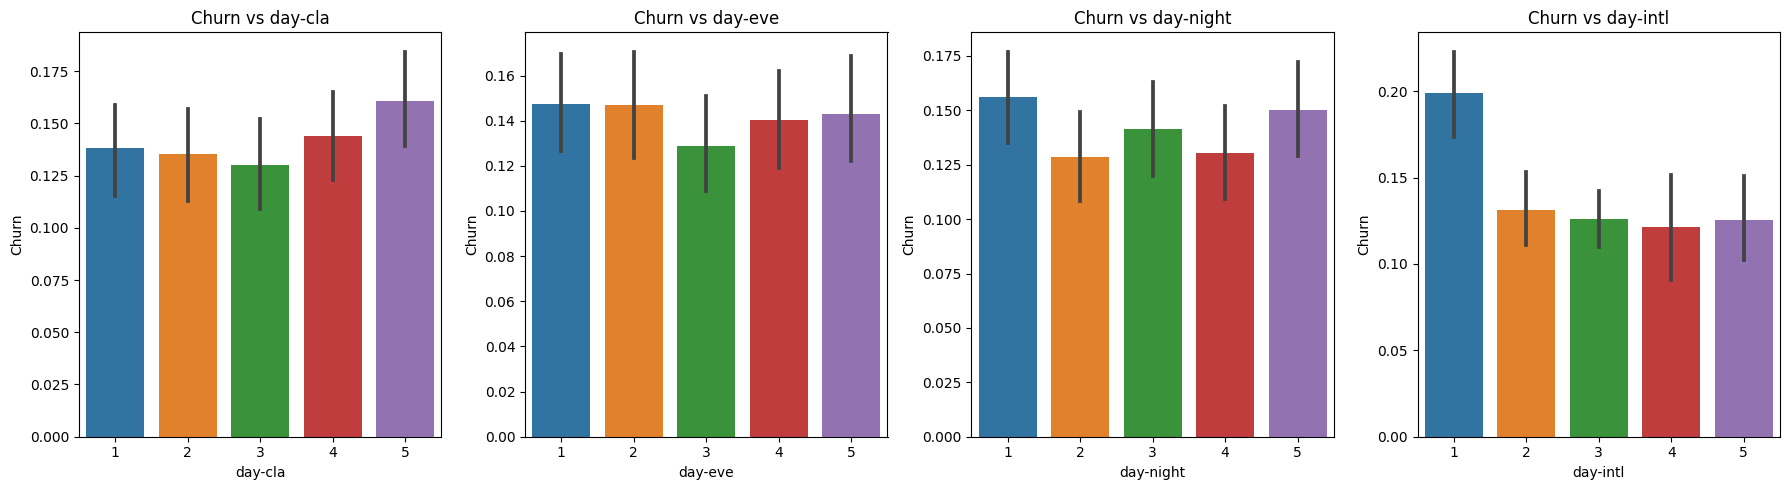

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

scatter_columns = ['day-cla', 'day-eve', 'day-night', 'day-intl']

for i, col in enumerate(scatter_columns):
    sns.barplot(data=df, x=col, y='Churn', ax=axes[i])
    axes[i].set_title(f'Churn vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Churn')

plt.tight_layout()
plt.show()


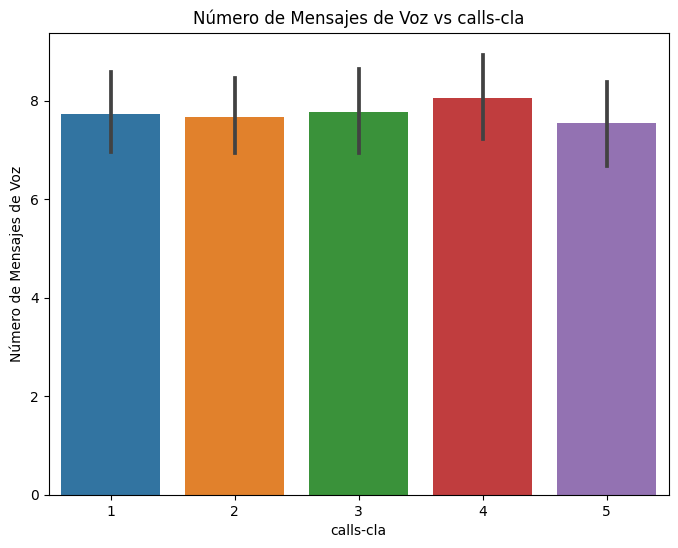

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='calls-cla', y='number_vmail_messages')
plt.title('Número de Mensajes de Voz vs calls-cla')
plt.xlabel('calls-cla')
plt.ylabel('Número de Mensajes de Voz')
plt.show()


Debajo podemos ver que mientras mas gasta, mas se queda el usuario

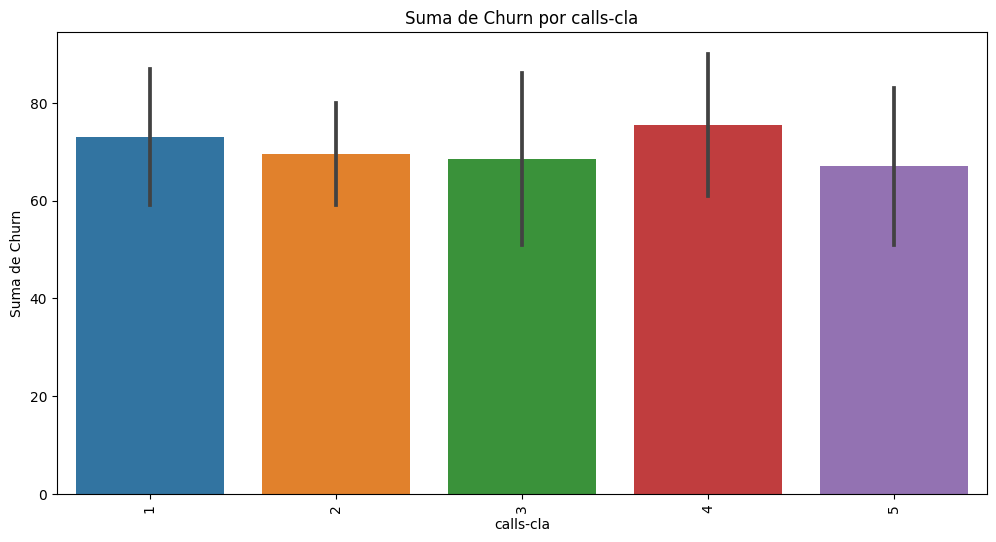

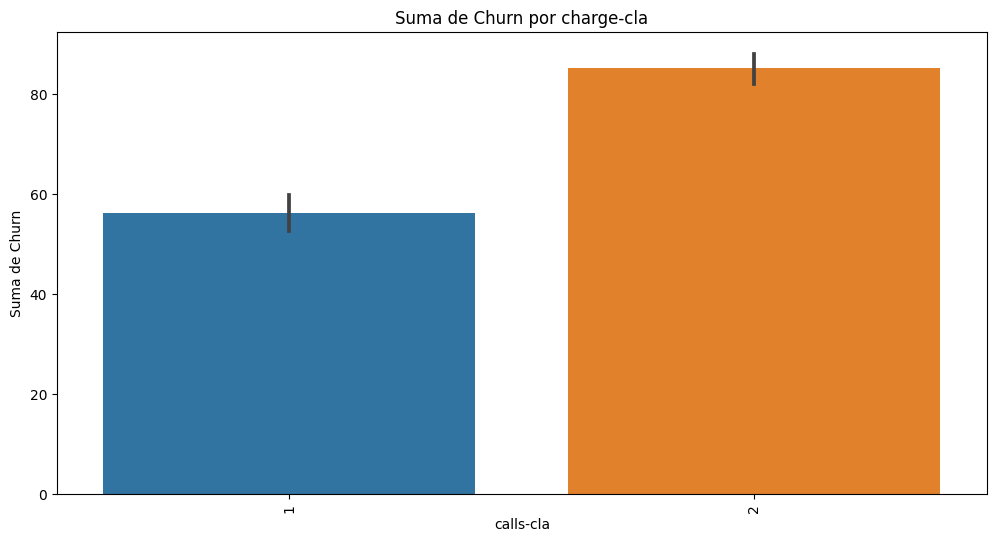

In [14]:
grouped_data = df.groupby(['calls-cla', 'charge-cla'])['Churn'].sum().reset_index()


plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='calls-cla', y='Churn')
plt.title('Suma de Churn por calls-cla')
plt.xlabel('calls-cla')
plt.ylabel('Suma de Churn')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='charge-cla', y='Churn')
plt.title('Suma de Churn por charge-cla')
plt.xlabel('calls-cla')
plt.ylabel('Suma de Churn')
plt.xticks(rotation=90)
plt.show()

Nuestras mejores relaciones se dan en llamadas a ss a cliente, international plan, charge

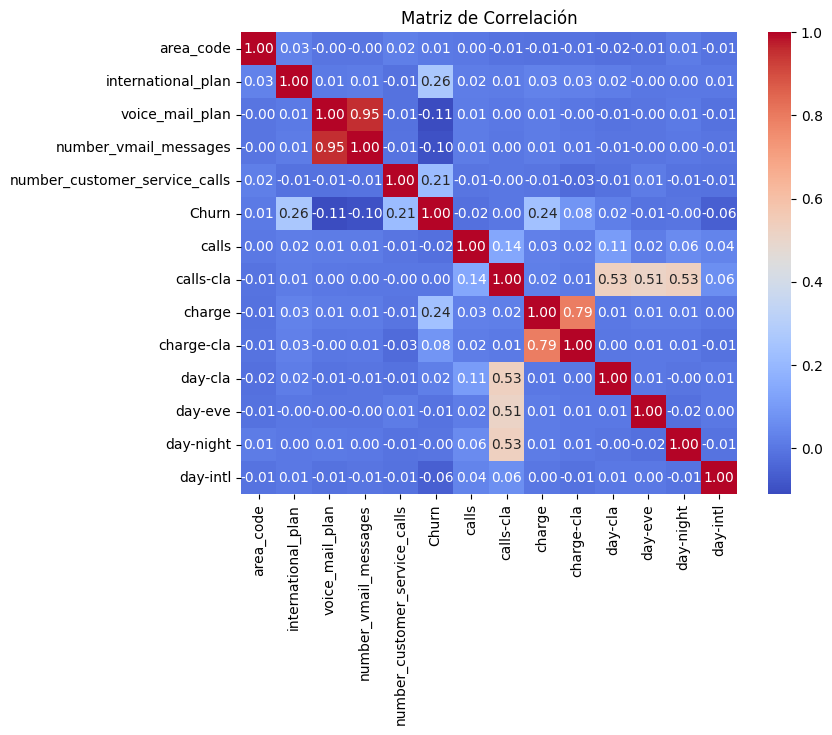

In [15]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))  
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


# ML model

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,number_customer_service_calls,Churn,calls,calls-cla,charge,charge-cla,day-cla,day-eve,day-night,day-intl
0,KS,415,0,1,25,1,0,303,3,75.56,2,4,3,2,2
1,OH,415,0,1,26,1,0,332,4,59.24,1,5,3,3,2
2,NJ,415,0,0,0,0,0,333,4,62.29,2,4,4,3,3
3,OH,408,1,0,0,2,0,255,1,66.80,2,1,2,2,5
4,OK,415,1,0,0,3,0,359,5,52.09,1,4,5,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,HI,408,0,1,40,2,0,374,5,75.09,2,5,5,4,3
4996,WV,415,0,0,0,3,1,278,2,66.72,2,2,1,4,1
4997,DC,415,0,0,0,1,0,318,4,51.82,1,2,5,3,3
4998,DC,510,0,0,0,0,0,254,1,59.09,1,1,2,2,4


In [16]:
dummed = ['state']
df_encoded = pd.get_dummies(df, columns=dummed)

## Data preparation

In [32]:
scaler = StandardScaler()

X = df_encoded.drop(columns= ['Churn'])
y = df_encoded['Churn']

X.shape

(5000, 64)

In [36]:
pca = PCA(n_components=5) 
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_pca_train_scaled = scaler.fit_transform(X_train)
X_pca_test_scaled = scaler.transform(X_test)


In [41]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_pca_train_scaled, y_train)

y_pred = logistic_regression.predict(X_pca_test_scaled)


# Evaluar con confusion_matrix y classification_report
print('Matriz de Confusión y Reporte de Clasificación con logistic:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Matriz de Confusión y Reporte de Clasificación con logistic:
[[861   0]
 [134   5]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       861
           1       1.00      0.04      0.07       139

    accuracy                           0.87      1000
   macro avg       0.93      0.52      0.50      1000
weighted avg       0.88      0.87      0.81      1000



In [43]:
# Modelo ensemble: XGBoost
xgb_classifier = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_classifier.fit(X_pca_train_scaled, y_train)
y_pred_xgb = xgb_classifier.predict(X_pca_test_scaled)


# Evaluar con confusion_matrix y classification_report
print('Matriz de Confusión y Reporte de Clasificación con XGBoost:')
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Matriz de Confusión y Reporte de Clasificación con XGBoost:
[[854   7]
 [ 73  66]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       861
           1       0.90      0.47      0.62       139

    accuracy                           0.92      1000
   macro avg       0.91      0.73      0.79      1000
weighted avg       0.92      0.92      0.91      1000



In [45]:
umbral = 0.5
y_binario = (y >= umbral).astype(int)


# Regresión Logística con regularización Lasso
lasso_classifier = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
lasso_classifier.fit(X_pca_train_scaled, y_train)
y_pred_lasso = lasso_classifier.predict(X_pca_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred_lasso)
confusion = confusion_matrix(y_test, y_pred_lasso)
classification_rep = classification_report(y_test, y_pred_lasso)

print(f'Accuracy con Regresión Lasso: {accuracy:.2f}')
print('Matriz de Confusión:')
print(confusion)
print('Reporte de Clasificación:')
print(classification_rep)

Accuracy con Regresión Lasso: 0.87
Matriz de Confusión:
[[861   0]
 [134   5]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       861
           1       1.00      0.04      0.07       139

    accuracy                           0.87      1000
   macro avg       0.93      0.52      0.50      1000
weighted avg       0.88      0.87      0.81      1000



Observaciones:

Los resultados de Regresión Logística smuy parecidos a los de Regresión Lasso, lo que sugiere que la regularización Lasso no tienen un  impacto diferencial para este analisis.


Comparación:

XGBoost supera a los otros dos modelos  para la clase 1  proporcionando a su vez un mejor equilibrio entre precisión y recall.
Aunque Regresión Lasso y Regresión Logística tienen un buen accuracy general, son deficientes en la identificación de clientes que abandonaron (clase 1).

Es importante considerar que estas evaluaciones se basan en un umbral predeterminado (0.5) el cual podemos modificar y ver cómo afecta el rendimiento del modelo.

En sintesis ver que la mejor aproximacion es XGBoost con menor tasa de errores y accuracy mas elevado.

4 Próximos pasos
(1) Clientes objetivo
Asume que vas a ejecutar acciones comerciales con 500 clientes, y que estas acciones tienen
un coste 0. ¿Cómo seleccionarías a esos 500 clientes objetivo, para obtener un máximo
beneficio?

En este caso con las medidas que podemos apreciar mas arriba buscariamos que los clientes tomen planes internacionales lo cual hace que se genere mayor fidelidad


(2) Clientes objetivo con diferentes niveles de beneficio
Hasta este punto has asumido que todos los clientes tienen el mismo valor para la telco.
Incorpora ahora la idea de que los clientes tienen diferentes niveles de beneficio para la telco, y
que te interesa más conservar unos que otros. (Puedes por ejemplo utilizar la variable que has
generado para agrupar clientes por niveles de consumo). ¿Cómo seleccionarías a los 500
clientes objetivo, para obtener un máximo beneficio?

Buscaria los clientes que sean de consumo medio pero esten dentro del 1 pero no tengan planes internacionales y si tengan gastos realizados en este ambito para buscar convertirlos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d760eadb-aa00-42e0-b3ce-21e258218c51' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>